<a href="https://colab.research.google.com/github/Amana28/Facial-Feature-Detector/blob/master/Amana_Wasay_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.callbacks import EarlyStopping

# Importing our Dataset

In [2]:
# Mount Google Drive containing CelebA dataset 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Add dataset directory
dataset_folder = '/content/drive/MyDrive/CelebA'

# Check contents of the directory
os.listdir(dataset_folder)

Mounted at /content/drive


['img_align_celeba.zip', 'Eval', 'Anno', 'Other']

In [3]:
# Unzip CelebA dataset
!unzip -q drive/MyDrive/CelebA/img_align_celeba.zip

In [4]:
# Images folder
img_folder = 'img_align_celeba'
 
# Create a list of filenames in our dataset 
img_filenames = sorted(os.listdir(img_folder))

# Checking the number of Images in our Dataset
num_images = len(img_filenames) 


print("Size of our dataset: " + str(len(img_filenames)))
print("First element: " + img_filenames[0])

Size of our dataset: 202599
First element: 000001.jpg


# Exploring our Dataset

In [5]:
# Read the attributes file into a pandas DataFrame
attributes_df = pd.read_csv(dataset_folder + '/Anno/list_attr_celeba.txt', delim_whitespace=True, skiprows=1)

attributes_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1


# Visualizing our data

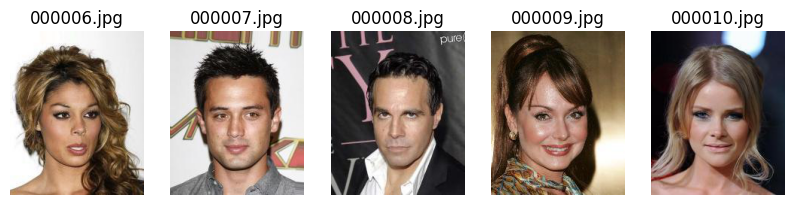

In [6]:
# Display 5 Images from our dataset

img_list = img_filenames[5:10]

fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for i, img_file in enumerate(img_list):
    img = plt.imread(img_folder + "/" + img_file)
    axs[i].imshow(img)
    axs[i].set_title(img_file)
    axs[i].axis('off')
plt.show()

### Displaying 5 Random 'Attractive' faces

img_align_celeba/057587.jpg
img_align_celeba/032085.jpg
img_align_celeba/134613.jpg
img_align_celeba/073336.jpg
img_align_celeba/129983.jpg


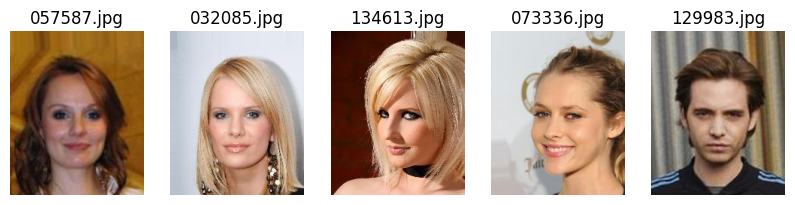

In [7]:
# Set the seed for reproducibility
np.random.seed(7)

# Filter the dataframe to only attractive people
attractive_df = attributes_df[attributes_df['Attractive'] == 1]
not_attractive_df = attributes_df[attributes_df['Attractive'] == -1]

# Get a random sample of 5 attractive people
sample_attr_df = attractive_df.sample(n=5)
sample_not_attr_df = not_attractive_df.sample(n=5)

# Display the images
fig, axs = plt.subplots(1, 5, figsize=(10, 3))

img_index = 0
for image_id, row in sample_attr_df.head(5).iterrows():
    print(img_folder + '/' +image_id)
    img = plt.imread(img_folder + '/' +image_id)
    axs[img_index].imshow(img)
    axs[img_index].set_title(image_id)
    axs[img_index].axis('off')
    img_index += 1

plt.show()

### Display 5 Random 'non attractive' faces

---



img_align_celeba/038089.jpg
img_align_celeba/182916.jpg
img_align_celeba/191408.jpg
img_align_celeba/063326.jpg
img_align_celeba/042655.jpg


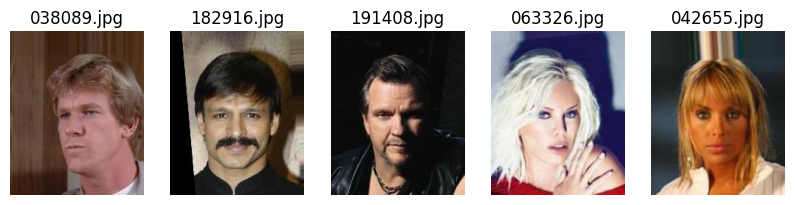

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3))

img_index = 0
for image_id, row in sample_not_attr_df.head(5).iterrows():
    print(img_folder + '/' +image_id)
    img = plt.imread(img_folder + '/' +image_id)
    axs[img_index].imshow(img)
    axs[img_index].set_title(image_id)
    axs[img_index].axis('off')
    img_index += 1

plt.show()

# Creating Y variable (labels)

In [9]:
# Creating our target variable y -- indexed by image id
y_df = attributes_df.loc[:, ["Attractive"]]
y = y_df.to_numpy()

# Replacing -1 with 0 in y
y = np.where(y == -1, 0, y)

In [10]:
y.shape

(202599, 1)

# Creating Train, Test and Valid data files

In [11]:
train_files, test_files, train_labels, test_labels = train_test_split(img_filenames, y, test_size=0.2, random_state=42)
test_files, val_files, test_labels, val_labels = train_test_split(test_files, test_labels, test_size=0.5, random_state=42)

# Preparing our Data - Using Generator

In [12]:
# Creating a Generator object with unlimited data generation
def image_batch_generator(image_dir, filenames, labels, batch_size):
    num_batches = len(filenames) // batch_size

    # Define the target image size
    target_size = (64, 64)
    # Define the number of channels
    num_channels = 3

    while True:
        for batch_index in range(num_batches):
            batch_start = batch_index * batch_size
            batch_end = batch_start + batch_size
            batch_files = filenames[batch_start:batch_end]

            images = np.empty((batch_size, *target_size, num_channels), dtype=np.float32)
            batch_labels = labels[batch_start:batch_end]

            for i, file_name in enumerate(batch_files):
                image_path = os.path.join(image_dir, file_name)
                img = Image.open(image_path).resize(target_size)
                # Convert the image to a NumPy array
                img_array = np.array(img, dtype=np.float32)
                # Normalize the pixel values to the range [0, 1]
                img_array /= 255.0
                # Add the preprocessed image to the batch
                images[i] = img_array

            yield np.array(images), np.array(batch_labels)

In [13]:
# Create instances of the generator object for each split (train, test, validation)
batch_size = 8

train_generator = image_batch_generator(image_dir=img_folder, filenames=train_files, labels=train_labels, batch_size=batch_size)
test_generator = image_batch_generator(image_dir=img_folder, filenames=test_files, labels=test_labels, batch_size=batch_size)
val_generator = image_batch_generator(image_dir=img_folder, filenames=val_files, labels=val_labels, batch_size=batch_size)

In [14]:
# Define a CNN model architecture 

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [17]:
# Define the number of epochs and steps per epoch
num_epochs = 3
train_steps = len(train_files) // batch_size
val_steps = len(val_files) // batch_size

In [18]:
# Fit the model using the our generator objects

history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=train_steps,
                    validation_data=val_generator, validation_steps=val_steps)

Epoch 1/3
20259/20259 [==============================] - 292s 14ms/step - loss: 0.4810 - accuracy: 0.7645 - val_loss: 0.4491 - val_accuracy: 0.7809
Epoch 2/3
20259/20259 [==============================] - 279s 14ms/step - loss: 0.4458 - accuracy: 0.7869 - val_loss: 0.4417 - val_accuracy: 0.7873
Epoch 3/3
20259/20259 [==============================] - 279s 14ms/step - loss: 0.4343 - accuracy: 0.7936 - val_loss: 0.4346 - val_accuracy: 0.7892


In [19]:
import signal

# Define the timeout duration in seconds
timeout_seconds = 180



# Define a function to handle the timeout
def timeout_handler(signum, frame):
    raise TimeoutError("Execution timed out")

# Set the timeout signal
signal.signal(signal.SIGALRM, timeout_handler)
signal.alarm(timeout_seconds)

try:
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(test_generator)

    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    # It will be interrupted if it runs longer than the timeout duration
    # ...
except TimeoutError:
    print(" Testing time exceeded the limit. Stopping...")
finally:
    # Disable the timeout signal
    signal.alarm(0) 

  14836/Unknown - 180s 12ms/step - loss: 0.4379 - accuracy: 0.7905 Testing time exceeded the limit. Stopping...


# Preparing our data - Reduced DataSet

In [33]:
reduced_dataset_size = 50000

# Create a list of filenames in our reduced dataset 
img_filenames_reduced = sorted(os.listdir(img_folder))[:reduced_dataset_size]

# Checking the number of Images in our reduced Dataset
num_images_reduced = len(img_filenames_reduced) 

num_images_reduced

50000

In [40]:
# Creating numpy array of size (num_images, height, width, channels) - takes about 10 minutes

# Define the target image size
target_size = (64, 64)

# Define the number of channels
num_channels = 3

# Create an empty array to hold the images
x_reduced = np.empty((num_images_reduced, *target_size, num_channels), dtype=np.float32)

# Iterate over the image filenames
for i, img_filename in enumerate(img_filenames_reduced):
    # Load the image and resize it
    img_path = os.path.join(img_folder, img_filename)
    img = Image.open(img_path).resize(target_size)

    # Convert the image to a NumPy array
    img_array = np.array(img, dtype=np.float32)

    # Normalize the pixel values to the range [0, 1]
    img_array /= 255.0

    # Add the image to the array
    x_reduced[i] = img_array

    if (i%10000 == 0):
      print("Progress: " + str(((i)/num_images_reduced * 100)) + " %")

Progress: 0.0 %
Progress: 20.0 %
Progress: 40.0 %
Progress: 60.0 %
Progress: 80.0 %


In [41]:
# Creating our target variable y -- indexed by image id
y_df_reduced = attributes_df.loc[:, ["Attractive"]][:reduced_dataset_size]
y_reduced = y_df_reduced.to_numpy()

# Replacing -1 with 0 in y
y_reduced = np.where(y_reduced == -1, 0, y_reduced)

In [42]:
# Splitting x and y into train, valid, test sets
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y_reduced, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
x_train_reduced, x_val_reduced,  y_train_reduced, y_val_reduced = train_test_split(x_train_reduced, y_train_reduced, test_size=0.2, random_state=42)

In [44]:
# Train the model
history = model.fit(x_train_reduced, y_train_reduced, epochs=10, batch_size=32, validation_data=(x_val_reduced, y_val_reduced))

Epoch 1/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4179 - accuracy: 0.8002 - val_loss: 0.4158 - val_accuracy: 0.8001
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4099 - accuracy: 0.8053 - val_loss: 0.4203 - val_accuracy: 0.7991
Epoch 3/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4012 - accuracy: 0.8083 - val_loss: 0.4226 - val_accuracy: 0.7960
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3924 - accuracy: 0.8117 - val_loss: 0.4259 - val_accuracy: 0.7970
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3792 - accuracy: 0.8198 - val_loss: 0.4282 - val_accuracy: 0.7908
Epoch 6/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3651 - accuracy: 0.8268 - val_loss: 0.4404 - val_accuracy: 0.7931
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3513 - accuracy: 0.8318 - val_loss: 0.4590 - val_accuracy:

In [45]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_reduced)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test Loss: 0.0
Test Accuracy: 0.0


313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[3570 1265]
 [ 855 4310]]
Precision: 0.7730941704035874
Recall: 0.8344627299128751
F1-score: 0.802607076350093


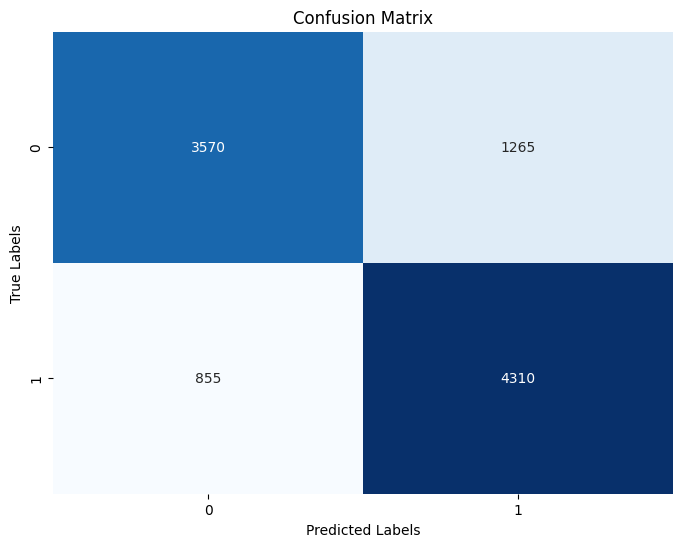

In [47]:
# Make predictions on the test set
predictions = model.predict(x_test_reduced)

# Convert predicted probabilities to class labels
predicted_labels = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(y_test_reduced, predicted_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_reduced, predicted_labels)
recall = recall_score(y_test_reduced, predicted_labels)
f1 = f1_score(y_test_reduced, predicted_labels)

print('Confusion Matrix:')
print(cm)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()